# Flights Data Analysis
## by Parida 

## Investigation Overview

> To provide insights regarding delayed flights

## Dataset Overview

> This dataset reports flights in the United States for 2008, it consists of various columns related to delay and cancellation of flights. Data source link: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
flights_data = pd.read_csv('2008.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Flight Delays by Month

> Here we will showcase the the month wise flight delays. We can see from the chart that most of the flight delays occur in February

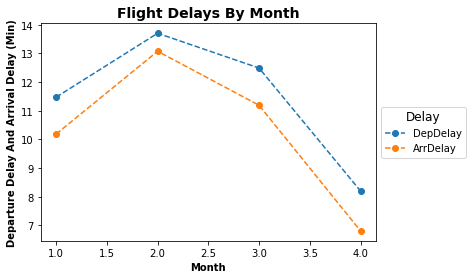

In [4]:
#delays by month (polished)
flights_data.groupby('Month').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.line(linestyle='--', marker='o');
plt.title('Flight Delays By Month'.title(),
               fontsize = 14, weight = "bold")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Delay", title_fontsize = 12)
plt.xlabel('Month'.title(),fontsize = 10, weight = "bold")
plt.ylabel('Departure Delay and Arrival Delay (min)'.title(),fontsize = 10, weight = "bold")
plt.show()

## Flight Delays by Day Of Week

> Here we will showcase the the day of week with flight delays. We can see from the chart that most of the flight delays occur on Friday

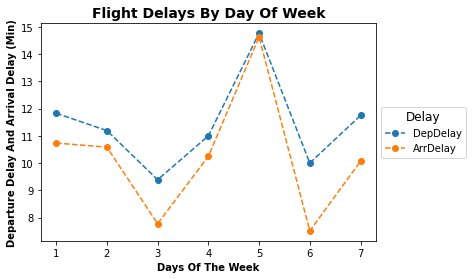

In [5]:
#delays by days of week (polished)
flights_data.groupby('DayOfWeek').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.line(linestyle='--', marker='o')
plt.title('Flight Delays By Day Of Week'.title(),
               fontsize = 14, weight = "bold")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Delay", title_fontsize = 12)
plt.xlabel('Days of the Week'.title(),fontsize = 10, weight = "bold")
plt.ylabel('Departure Delay and Arrival Delay (min)'.title(),fontsize = 10, weight = "bold")
plt.show()

## Occurence of Delay Types
> We see that the NAS Delays occur the most and Security Delays occur the least

In [8]:
delay_car = flights_data[(~flights_data.CarrierDelay.isnull()) & (flights_data.CarrierDelay!=0)].shape[0] / flights_data.shape[0]
delay_weather = flights_data[(~flights_data.WeatherDelay.isnull()) & (flights_data.WeatherDelay!=0)].shape[0] / flights_data.shape[0]
delay_nas = flights_data[(~flights_data.NASDelay.isnull()) & (flights_data.NASDelay!=0)].shape[0] / flights_data.shape[0]
delay_sec = flights_data[(~flights_data.SecurityDelay.isnull()) & (flights_data.SecurityDelay!=0)].shape[0] / flights_data.shape[0]
delay_late = flights_data[(~flights_data.LateAircraftDelay.isnull()) & (flights_data.LateAircraftDelay!=0)].shape[0] / flights_data.shape[0]

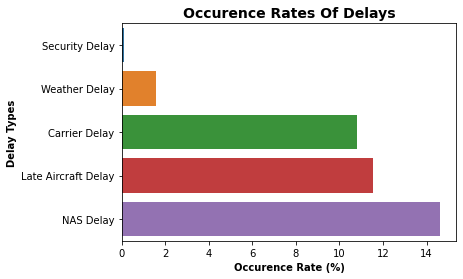

In [7]:
#polished bar chart
delays = pd.Series([delay_car,delay_weather,delay_nas,delay_sec,delay_late], index=["Carrier Delay","Weather Delay","NAS Delay","Security Delay","Late Aircraft Delay"]).sort_values(ascending=True)

sb.barplot(delays*100,delays.index,orient="h");
plt.title('Occurence Rates of Delays'.title(),
               fontsize = 14, weight = "bold")
plt.xlabel('Occurence Rate (%)'.title(),fontsize = 10, weight = "bold")
plt.ylabel('Delay Types'.title(),fontsize = 10, weight = "bold")
plt.show()